In [226]:
import random
def Bi():
    a = random.random()
    return 1 if a >= 0.5 else 0

In [227]:
def B(n):
    return [Bi() for i in range(n)]



In [228]:
def fB(B,n):
    return sum([2**(i-1)*B[i-1] for i in range(1,n+1)])

In [229]:
import numpy as np
def PZ_B(n, alpha, Z, B): # a*b^n = e^(log(a)+ log(b)*n)
    constant = np.log((1-alpha)/(1+alpha))
    res = constant
    res += np.log(alpha)*abs(Z-fB(B,n))
    return np.exp(res)
    

In [230]:
def PZ_B_old(n, alpha, Z, B): 
    return ((1-alpha)/(1+alpha)) * (alpha **abs(Z-fB(B,n)))
    

In [231]:
b = B(10)
print(PZ_B(10, 0.1, 128, b), PZ_B_old(10, 0.1, 128, b))

0.0 0.0


In [232]:

def likelihood_weighting(N, n, alpha, Z, target_bi):
    numerator = 0.0
    denominator = 0.0
    estimates = []
    
    for sample in range(N):
        b_lst = B(n)
        pz_b = PZ_B(n, alpha, Z, b_lst)
        
        numerator += b_lst[target_bi] * pz_b # I(bi, bi')* P(Z|B1, B2, B3...B10)
        denominator += pz_b # P(Z|B1, B2, B3...B10)
        
        if denominator == 0: # due to pz_b too small
            estimates.append(0)
        else:
            estimates.append(numerator/denominator)
    return estimates


[0.09847218633146385, 0.09847218633146385, 0.09847218633146385, 0.09847218633146385, 0.09847218633146385, 0.09847218633904911, 0.09847218633904911, 0.09847218633904911, 0.09847218633904911]


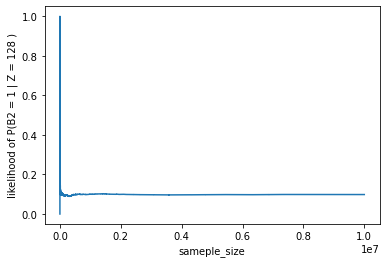

[0.09061998647019387, 0.09061998647019387, 0.09061998647019387, 0.09061998647019387, 0.09061998723751934, 0.09061998723751934, 0.09061998723751934, 0.09061998723751934, 0.09061998723751934]


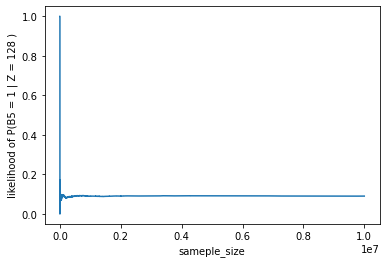

[0.9086539549018728, 0.9086539549018728, 0.9086539549018728, 0.9086539549018728, 0.9086539549018728, 0.9086539549018728, 0.9086539549018728, 0.9086539549018728, 0.9086539549018728]


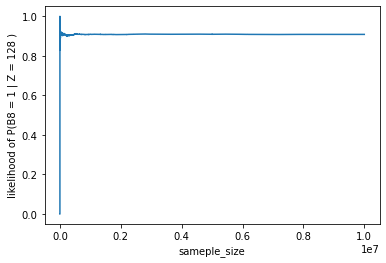

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


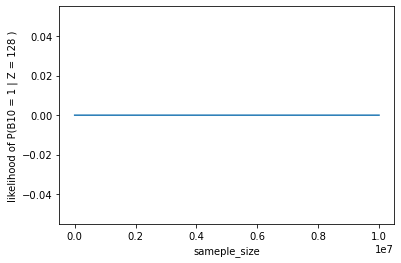

In [233]:
import matplotlib.pyplot as plt

target_bis = [1,4,7,9] # index of [2, 5, 8，10]
sample_size = 10000000 # 10^7
Bi_size = 10  #n
noise_level = 0.1 # alpha
Z = 128

for target_bi in target_bis:
    result = likelihood_weighting(sample_size, Bi_size, noise_level, Z, target_bi)
    print(result[-10:-1])
    plt.plot(result)
    plt.xlabel('sameple_size')
    plt.ylabel(f'likelihood of P(B{target_bi+1} = 1 | Z = 128 )')
    plt.show()
    
